In [56]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import seaborn as sns
import torch as th
import matplotlib.pyplot as plt
from aimanager.utils.utils import make_dir
from aimanager.utils.merge import merge_files_by_name

sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})


run = 'v1_agents'

base_folder = f'../../data/manager/simulate_rule/{run}'

folder = os.path.join(base_folder, 'train')
merged_folder = os.path.join(base_folder, 'merged')

plot_folder = f'plots/{run}'

make_dir(plot_folder)
make_dir(merged_folder)

id_vars = ['s', 'round_number', 'n_agents', 'agent']


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


$pun = (20-cont) \cdot s + cont? \cdot  c - b$

In [57]:
file_names = ['trace.csv']


def get_df(file_name, merged_folder, folder):
    m_file = os.path.join(merged_folder, file_name)
    if not os.path.isfile(m_file):
        df = merge_files_by_name(folder, file_name)
        df.to_parquet(m_file)
        return df
    else:
        return pd.read_parquet(m_file)

sim_df = get_df('trace.csv', merged_folder, folder)


In [58]:
sim_df = sim_df.sort_values(id_vars)

df_melt = pd.melt(sim_df, id_vars=id_vars, value_vars=['punishments', 'common_good', 'contributions', 'payoffs'], var_name='metric', value_name='value')

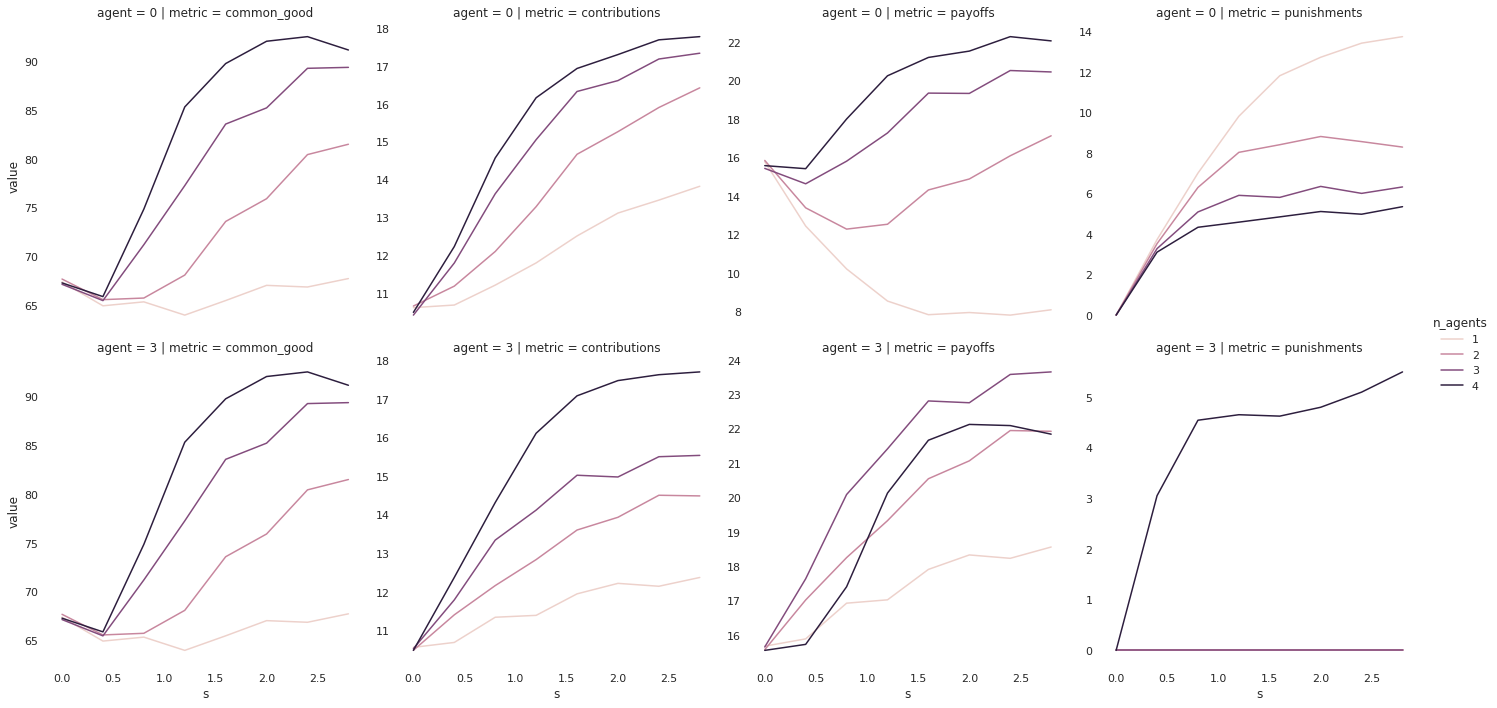

In [62]:
df = df_melt.groupby(['s', 'metric', 'n_agents', 'agent'])['value'].mean().reset_index()


w = (
    df['agent'].isin([0, 3])
)
df = df[w]

df[['agent', 'n_agent']] = df[['agent', 'n_agents']].astype(str)

sns.relplot(data=df, x='s', y='value', hue='n_agents', row='agent', col='metric', kind='line', ci=None, facet_kws={'sharey': False, 'sharex': True})


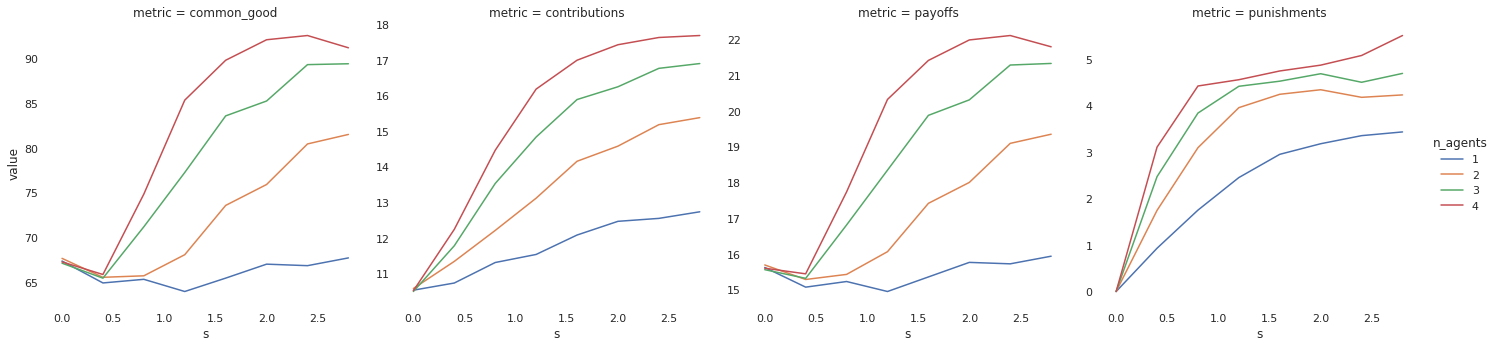

In [60]:
df = df_melt.groupby(['s', 'metric', 'n_agents'])['value'].mean().reset_index()


df['n_agents'] = df['n_agents'].astype(str)

sns.relplot(data=df, x='s', y='value', hue='n_agents', col='metric', col_wrap=4, kind='line', ci=None, facet_kws={'sharey': False, 'sharex': True})